In [1]:
import pandas as pd

In [55]:
df = pd.read_csv('../data/full_survey_data.csv')

/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_1630/4096187165.py:1: DtypeWarning: Columns (10,11,12,15,16,17,18,19,20,21,22,24,27,37,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,69,74,75,76,78,88,91,94,95,104,113,114,115,116,118,121,122,123,124,125,132,135,137,138,141,142,151,160,161,162,163,165,168,169,170,171,172,179,182,184,185,188,189,198,207,208,209,210,212,215,216,217,218,219,226,229,231,232,236,245,254,255,256,257,259,262,263,264,265,266,273,276,278,279,283,292,301,302,303,304,306,309,310,312,313,320,325,326,330,339,348,349,350,351,353,356,357,359,360,367,372,373,377,386,395,396,397,398,400,403,404,406,407,414,419,420,424,433,443,444,445,446,447,448,450,451,452,453,454,455,456,458,459,460,461,462,463,464,465,466,467,469,470,471,472,473,474,475,476,478,479,480,481,482,500,501,502,508,510,515,516,522,524,525,526,533,538,547,556,561,565,566,567,574,580,581,582,591,600,603,607,608,609,616,620,624,633,680,681,682,687,688,694,696,697,698,705,710

In [4]:
df.crop_price_1.value_counts()

crop_price_1
inf           315
20.000000     279
100.000000    260
10.000000     256
250.000000    239
             ... 
42.666667       1
29.493088       1
19.809524       1
96.694892       1
4.061538        1
Name: count, Length: 4837, dtype: int64

In [5]:
df[df.crop_price_1.replace([float('inf'), float('-inf')], pd.NA).notna()].crop_price_1.describe()

count    2.122900e+04
mean     1.270789e+04
std      7.769423e+05
min      0.000000e+00
25%      1.133787e+01
50%      4.761905e+01
75%      2.857143e+02
max      1.125000e+08
Name: crop_price_1, dtype: float64

In [19]:
df[df.crop_price_1 ==  1750000].country

8276    burundi
Name: country, dtype: object

In [12]:
df[df.crop_price_1.replace([float('inf'), float('-inf')], pd.NA).notna()].crop_price_1.sort_values(ascending=False).head(10)

32131    112500000.0
8378       6000000.0
8683       5000000.0
44939      2940000.0
45065      2255000.0
44943      1915200.0
45734      1800000.0
44938      1764000.0
8276       1750000.0
8223       1700000.0
Name: crop_price_1, dtype: float64

In [56]:
# Create a list of tuples for each crop's pair of name and residue
records = []
for i in range(1, 9):
    temp_df = df[['id_unique', f'crop_name_{i}', f'crop_residue_use_{i}',f'crop_harvest_kg_per_year_{i}',f'crop_price_{i}','country','year']].copy()
    temp_df.columns = ['id_unique', 'crop_name', 'crop_residue_use','crop_harvest_kg_per_year','crop_price_per_kg','country','year']
    temp_df['crop_number'] = i
    records.append(temp_df)

# Concatenate all together
long_df = pd.concat(records, ignore_index=True)

# Drop rows where crop_name is NaN
#long_df = long_df.dropna(subset=['crop_name'])

#sort
long_df = long_df.sort_values(['id_unique', 'crop_number']).reset_index(drop=True)
long_df

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_price_per_kg,country,year,crop_number
0,bf_adn_2019_10_1,millet,soil feed,1200.0,20.833333,burkina_faso,2019,1
1,bf_adn_2019_10_1,groundnut,soil feed,NaN,NaN,burkina_faso,2019,2
2,bf_adn_2019_10_1,sesame,soil feed,100.0,120.000000,burkina_faso,2019,3
3,bf_adn_2019_10_1,NaN,NaN,NaN,NaN,burkina_faso,2019,4
4,bf_adn_2019_10_1,NaN,NaN,NaN,NaN,burkina_faso,2019,5
...,...,...,...,...,...,...,...,...
438979,zm_scn_2017_9_1,NaN,NaN,NaN,NaN,zambia,2017,4
438980,zm_scn_2017_9_1,NaN,NaN,NaN,NaN,zambia,2017,5
438981,zm_scn_2017_9_1,NaN,NaN,NaN,NaN,zambia,2017,6
438982,zm_scn_2017_9_1,NaN,NaN,NaN,NaN,zambia,2017,7


In [57]:
final_crop_df = long_df[(long_df.crop_name.notna()) & (long_df.crop_residue_use.notna())]


In [58]:
final_crop_df['burn_crop'] = final_crop_df['crop_residue_use'].str.contains('burn', case=False, na=False).astype(int)

/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_1630/2510554493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_crop_df['burn_crop'] = final_crop_df['crop_residue_use'].str.contains('burn', case=False, na=False).astype(int)


In [46]:
final_crop_df[final_crop_df.crop_residue_use.isna()]

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_price_per_kg,crop_number,burn_crop


In [59]:
# Drop rows with NaN in crop_harvest_kg_per_year or crop_price
final_crop_df = final_crop_df.dropna(subset=['crop_harvest_kg_per_year', 'crop_price_per_kg'])


In [ ]:
final_crop_df[final_crop_df.crop_harvest_kg_per_year.inf]

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_price_per_kg,crop_number,burn_crop
0,bf_adn_2019_10_1,millet,soil feed,1200.0,20.833333,1,0
2,bf_adn_2019_10_1,sesame,soil feed,100.0,120.000000,3,0
40,bf_adn_2019_15_1,millet,soil feed,200.0,300.000000,1,0
41,bf_adn_2019_15_1,maize,soil feed,1500.0,33.333333,2,0
112,bf_adn_2019_23_1,maize,feed soil,800.0,3000.000000,1,0
...,...,...,...,...,...,...,...
438928,zm_scn_2017_94_1,maize,soil,2250.0,8.000000,1,0
438936,zm_scn_2017_95_1,maize,soil,4500.0,200.000000,1,0
438946,zm_scn_2017_96_1,sunflower,soil,250.0,1.800000,3,0
438952,zm_scn_2017_97_1,maize,soil,600.0,4.500000,1,0


In [60]:
import numpy as np

# Drop rows with inf or -inf in crop_harvest_kg_per_year or crop_price_per_kg
final_crop_df = final_crop_df[
    ~(
        np.isinf(final_crop_df['crop_harvest_kg_per_year']) |
        np.isinf(final_crop_df['crop_price_per_kg'])
    )
]

In [61]:
final_crop_df.describe()

,crop_harvest_kg_per_year,crop_price_per_kg,year,crop_number,burn_crop
count,3.695900e+04,3.695900e+04,36959.000000,36959.000000,36959.000000
mean,6.654508e+03,2.647339e+04,2019.187153,1.995698,0.130117
std,1.543611e+05,1.890374e+06,1.732867,1.121765,0.336437
min,4.000000e-03,-2.500000e+02,2015.000000,1.000000,0.000000
25%,2.000000e+02,1.300000e+01,2018.000000,1.000000,0.000000
50%,6.000000e+02,1.000000e+02,2019.000000,2.000000,0.000000
75%,2.000000e+03,5.000000e+02,2021.000000,3.000000,0.000000
max,1.500000e+07,2.800000e+08,2023.000000,7.000000,1.000000


In [62]:
final_crop_df['crop_share'] =  final_crop_df['crop_harvest_kg_per_year'] * final_crop_df['crop_price_per_kg']
final_crop_df['crop_share'].describe()

count    3.695900e+04
mean     8.552443e+07
std      6.753819e+09
min     -1.500000e+05
25%      1.000000e+04
50%      7.000000e+04
75%      3.642857e+05
max      1.188000e+12
Name: crop_share, dtype: float64

In [63]:
final_crop_df

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_price_per_kg,country,year,crop_number,burn_crop,crop_share
0,bf_adn_2019_10_1,millet,soil feed,1200.0,20.833333,burkina_faso,2019,1,0,25000.0
2,bf_adn_2019_10_1,sesame,soil feed,100.0,120.000000,burkina_faso,2019,3,0,12000.0
40,bf_adn_2019_15_1,millet,soil feed,200.0,300.000000,burkina_faso,2019,1,0,60000.0
41,bf_adn_2019_15_1,maize,soil feed,1500.0,33.333333,burkina_faso,2019,2,0,50000.0
112,bf_adn_2019_23_1,maize,feed soil,800.0,3000.000000,burkina_faso,2019,1,0,2400000.0
...,...,...,...,...,...,...,...,...,...,...
438928,zm_scn_2017_94_1,maize,soil,2250.0,8.000000,zambia,2017,1,0,18000.0
438936,zm_scn_2017_95_1,maize,soil,4500.0,200.000000,zambia,2017,1,0,900000.0
438946,zm_scn_2017_96_1,sunflower,soil,250.0,1.800000,zambia,2017,3,0,450.0
438952,zm_scn_2017_97_1,maize,soil,600.0,4.500000,zambia,2017,1,0,2700.0


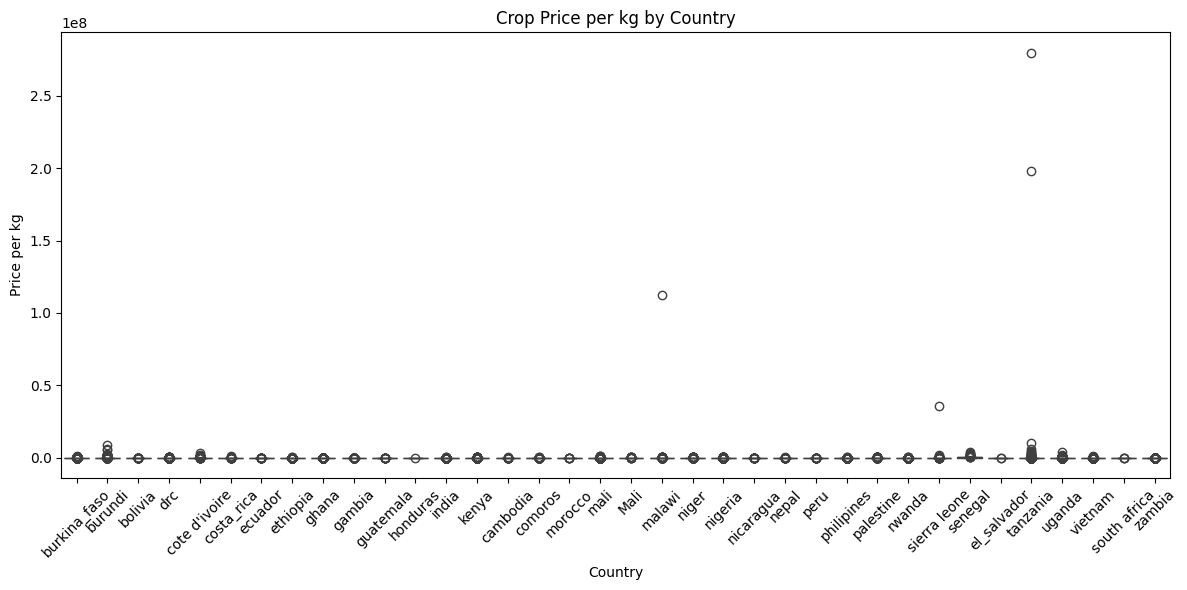

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=long_df, x='country', y='crop_price_per_kg')
plt.xticks(rotation=45)
plt.title('Crop Price per kg by Country')
plt.ylabel('Price per kg')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_1630/3985515636.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=long_df, x='country', y='crop_price_per_kg', estimator='mean', ci=None)


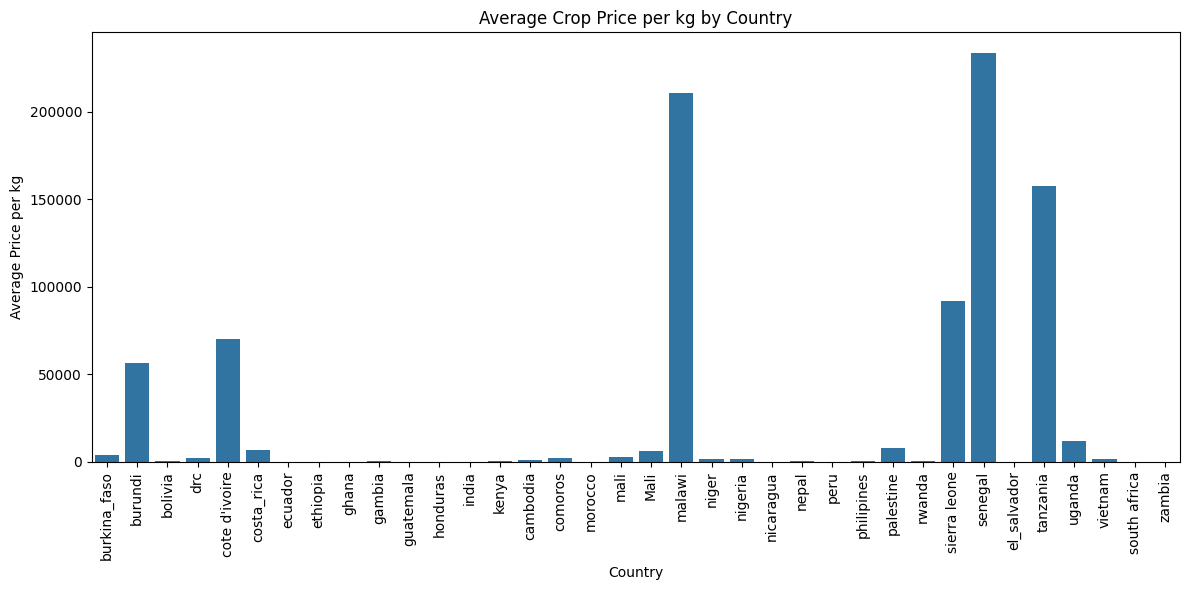

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x='country', y='crop_price_per_kg', estimator='mean', ci=None)
plt.xticks(rotation=90)
plt.title('Average Crop Price per kg by Country')
plt.ylabel('Average Price per kg')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

In [68]:
final_crop_df['burn_share'] = final_crop_df.burn_crop * final_crop_df.crop_share

In [74]:
final_crop_df[final_crop_df.crop_price_per_kg >= 2000000]

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_price_per_kg,country,year,crop_number,burn_crop,crop_share,burn_share
65385,bi_snv_2022_251_1,rice,feed,1400.000,2.000000e+06,burundi,2022,2,0,2.800000e+09,0.000000e+00
66426,bi_snv_2022_369_1,oilpalm,construction,900.000,9.000000e+06,burundi,2022,3,0,8.100000e+09,0.000000e+00
66464,bi_snv_2022_373_1,oilpalm,construction,600.000,6.000000e+06,burundi,2022,1,0,3.600000e+09,0.000000e+00
69168,bi_snv_2022_678_1,fruits,construction soil burn,2500.000,5.000000e+06,burundi,2022,1,1,1.250000e+10,1.250000e+10
69642,bi_snv_2022_730_1,rice,burn construction,128000.000,2.560000e+06,burundi,2022,3,1,3.276800e+11,3.276800e+11
69692,bi_snv_2022_736_1,rice,burn,2200.000,2.000000e+06,burundi,2022,5,1,4.400000e+09,4.400000e+09
85105,ci_arc_2018_56_1,cassava,soil,60.000,3.000000e+06,cote d'ivoire,2018,2,0,1.800000e+08,0.000000e+00
256504,mw_faw_2019_393_1,tobacco,construction,0.004,1.125000e+08,malawi,2019,1,0,4.500000e+05,0.000000e+00
359337,sl_ifd_2018_85_1,oilpalm,soil,800.000,3.589286e+07,sierra leone,2018,2,0,2.871429e+10,0.000000e+00
359659,sn_ftf_2018_121_1,groundnut,compost,20000.000,3.780000e+06,senegal,2018,4,0,7.560000e+10,0.000000e+00


In [75]:
# Step 1: Select relevant columns
name_cols = [f'livestock_name_{i}' for i in range(1, 6)]
died_cols = [f'livestock_died_{i}' for i in range(1, 6)]

# Step 2: Melt the livestock names and deaths
names_long = df.melt(id_vars='id_unique', value_vars=name_cols, 
                     var_name='animal_slot', value_name='livestock_name')

died_long = df.melt(id_vars='id_unique', value_vars=died_cols, 
                    var_name='animal_slot', value_name='livestock_died')

# Step 3: Make sure they align by extracting index number
names_long['slot'] = names_long['animal_slot'].str.extract(r'(\d+)').astype(int)
died_long['slot'] = died_long['animal_slot'].str.extract(r'(\d+)').astype(int)

# Step 4: Merge the two long DataFrames
long_df = pd.merge(
    names_long[['id_unique', 'slot', 'livestock_name']],
    died_long[['id_unique', 'slot', 'livestock_died']],
    on=['id_unique', 'slot']
)

# Optional: drop rows where animal name is missing
long_df = long_df.dropna(subset=['livestock_name']).reset_index(drop=True)

# Result: Each row is (id_unique, livestock_name, livestock_died)
print(long_df.head())

death_df = long_df[long_df.livestock_died.notna()]

         id_unique  slot livestock_name  livestock_died
0  bf_adn_2019_1_1     1          sheep             0.0
1  bf_adn_2019_2_1     1         cattle             0.0
2  bf_adn_2019_3_1     1           pigs             3.0
3  bf_adn_2019_4_1     1         cattle             0.0
4  bf_adn_2019_5_1     1         cattle             0.0


In [76]:
# List of animals to keep
animals_to_keep = ['cattle', 'chicken', 'goats', 'sheep', 'donkeys_horses', 'buffalo', 'pigs']

# Filter the DataFrame
final_death_df = death_df[death_df['livestock_name'].isin(animals_to_keep)]
final_death_df


,id_unique,slot,livestock_name,livestock_died
0,bf_adn_2019_1_1,1,sheep,0.0
1,bf_adn_2019_2_1,1,cattle,0.0
2,bf_adn_2019_3_1,1,pigs,3.0
3,bf_adn_2019_4_1,1,cattle,0.0
4,bf_adn_2019_5_1,1,cattle,0.0
...,...,...,...,...
81610,tz_glv_2017_156_1,5,donkeys_horses,0.0
81614,tz_glv_2017_522_1,5,pigs,0.0
81615,tz_glv_2017_562_1,5,donkeys_horses,0.0
81616,tz_glv_2017_889_1,5,chicken,3.0


In [77]:
# Sum livestock deaths per farm
deaths_by_farm = (
    final_death_df.groupby("id_unique")["livestock_died"]
    .sum()
    .reset_index(name="total_livestock_died")
)

deaths_by_farm.head()

,id_unique,total_livestock_died
0,bf_adn_2019_10_1,3.0
1,bf_adn_2019_11_1,5.0
2,bf_adn_2019_12_1,1.0
3,bf_adn_2019_13_1,3.0
4,bf_adn_2019_14_1,7.0


In [78]:
from scipy.stats.mstats import winsorize

# Extract the data column
values = deaths_by_farm["total_livestock_died"].values

# Winsorize only the top 5%
winsorized_values = winsorize(values, limits=(0, 0.05))


# Create a new column with the winsorized values
deaths_by_farm["winsorized_deaths"] = winsorized_values

In [93]:
# Step 1: Drop rows with missing harvest or price
final_crop_df_clean = final_crop_df.dropna(
    subset=["crop_harvest_kg_per_year", "crop_price_per_kg"]
).copy()

# Step 2: Calculate total monetary yield per crop , make prices positive
final_crop_df_clean["crop_total_monetary_yield"] = (
    final_crop_df_clean["crop_harvest_kg_per_year"] * final_crop_df_clean["crop_price_per_kg"].abs()
)

# Step 3: Get total monetary yield per farm
total_monetary_yield = (
    final_crop_df_clean.groupby("id_unique")["crop_total_monetary_yield"]
    .transform("sum")
)

# Step 4: Calculate monetary yield share for each crop
final_crop_df_clean["crop_monetary_yield_share"] = (
    final_crop_df_clean["crop_total_monetary_yield"] / total_monetary_yield
)

# Preview
print(
    final_crop_df_clean[
        ["id_unique", "crop_name", "crop_harvest_kg_per_year", "crop_price_per_kg",
         "crop_total_monetary_yield", "crop_monetary_yield_share"]
    ].head()
)


            id_unique crop_name  crop_harvest_kg_per_year  crop_price_per_kg  \
0    bf_adn_2019_10_1    millet                    1200.0          20.833333   
2    bf_adn_2019_10_1    sesame                     100.0         120.000000   
40   bf_adn_2019_15_1    millet                     200.0         300.000000   
41   bf_adn_2019_15_1     maize                    1500.0          33.333333   
112  bf_adn_2019_23_1     maize                     800.0        3000.000000   

     crop_total_monetary_yield  crop_monetary_yield_share  
0                      25000.0                   0.675676  
2                      12000.0                   0.324324  
40                     60000.0                   0.545455  
41                     50000.0                   0.454545  
112                  2400000.0                   1.000000  


In [94]:
final_crop_df_clean.drop(columns=['burn_share'], inplace=True)

KeyError: "['burn_share'] not found in axis"

In [95]:
final_crop_df_clean

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_price_per_kg,country,year,crop_number,burn_crop,crop_share,crop_total_monetary_yield,crop_monetary_yield_share
0,bf_adn_2019_10_1,millet,soil feed,1200.0,20.833333,burkina_faso,2019,1,0,25000.0,25000.0,0.675676
2,bf_adn_2019_10_1,sesame,soil feed,100.0,120.000000,burkina_faso,2019,3,0,12000.0,12000.0,0.324324
40,bf_adn_2019_15_1,millet,soil feed,200.0,300.000000,burkina_faso,2019,1,0,60000.0,60000.0,0.545455
41,bf_adn_2019_15_1,maize,soil feed,1500.0,33.333333,burkina_faso,2019,2,0,50000.0,50000.0,0.454545
112,bf_adn_2019_23_1,maize,feed soil,800.0,3000.000000,burkina_faso,2019,1,0,2400000.0,2400000.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
438928,zm_scn_2017_94_1,maize,soil,2250.0,8.000000,zambia,2017,1,0,18000.0,18000.0,1.000000
438936,zm_scn_2017_95_1,maize,soil,4500.0,200.000000,zambia,2017,1,0,900000.0,900000.0,1.000000
438946,zm_scn_2017_96_1,sunflower,soil,250.0,1.800000,zambia,2017,3,0,450.0,450.0,1.000000
438952,zm_scn_2017_97_1,maize,soil,600.0,4.500000,zambia,2017,1,0,2700.0,2700.0,1.000000


In [96]:
# Create a new column called burn_share
final_crop_df_clean["burn_share"] = (
    final_crop_df_clean["crop_monetary_yield_share"] * final_crop_df_clean["burn_crop"]
)

In [97]:
# Group by farm and sum burn_share
burn_share_by_farm = (
    final_crop_df_clean.groupby("id_unique")["burn_share"]
    .sum()
    .reset_index(name="total_burn_share")
)
print(burn_share_by_farm.head())

          id_unique  total_burn_share
0  bf_adn_2019_10_1               0.0
1  bf_adn_2019_15_1               0.0
2  bf_adn_2019_23_1               0.0
3  bf_adn_2019_24_1               0.0
4  bf_adn_2019_26_1               0.0


In [98]:
burn_share_by_farm[burn_share_by_farm.total_burn_share < 0]

,id_unique,total_burn_share


In [91]:
final_crop_df_clean[final_crop_df_clean.id_unique == 'ml_ta3_2017_238_1']

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_price_per_kg,country,year,crop_number,burn_crop,crop_share,crop_total_monetary_yield,crop_monetary_yield_share,burn_share
250328,ml_ta3_2017_238_1,millet,feed compost,900.0,277.777778,mali,2017,1,0,250000.0,250000.0,0.862069,0.000000
250329,ml_ta3_2017_238_1,cotton,burn compost,600.0,-250.000000,mali,2017,2,1,-150000.0,-150000.0,-0.517241,-0.517241
250330,ml_ta3_2017_238_1,sorghum,feed compost,450.0,277.777778,mali,2017,3,0,125000.0,125000.0,0.431034,0.000000
250331,ml_ta3_2017_238_1,maize,feed compost,200.0,125.000000,mali,2017,4,0,25000.0,25000.0,0.086207,0.000000
250332,ml_ta3_2017_238_1,sesame,burn feed compost,10000.0,4.000000,mali,2017,5,1,40000.0,40000.0,0.137931,0.137931


In [99]:
merged_farm_df = pd.merge(burn_share_by_farm, deaths_by_farm, on="id_unique", how="inner")

# Pearson correlation
corr = merged_farm_df["total_burn_share"].corr(merged_farm_df["winsorized_deaths"])
print(f"Correlation between total_burn_share and winsorized_deaths: {corr:.4f}")

Correlation between total_burn_share and winsorized_deaths: 0.0208


In [101]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define variables
X = merged_farm_df["winsorized_deaths"]
y = merged_farm_df["total_burn_share"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.125
Date:                Thu, 14 Aug 2025   Prob (F-statistic):            0.00761
Time:                        18:28:36   Log-Likelihood:                -3729.7
No. Observations:               16437   AIC:                             7463.
Df Residuals:                   16435   BIC:                             7479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1142      0.00

In [102]:
merged_farm_df

,id_unique,total_burn_share,total_livestock_died,winsorized_deaths
0,bf_adn_2019_10_1,0.0,3.0,3.0
1,bf_adn_2019_15_1,0.0,2.0,2.0
2,bf_adn_2019_23_1,0.0,3.0,3.0
3,bf_adn_2019_24_1,0.0,2.0,2.0
4,bf_adn_2019_26_1,0.0,10.0,10.0
...,...,...,...,...
16432,zm_scn_2017_89_1,0.0,4.0,4.0
16433,zm_scn_2017_94_1,0.0,0.0,0.0
16434,zm_scn_2017_95_1,0.0,0.0,0.0
16435,zm_scn_2017_96_1,0.0,1.0,1.0


In [103]:
merged_farm_df.describe()

,total_burn_share,total_livestock_died,winsorized_deaths
count,16437.000000,1.643700e+04,16437.000000
mean,0.117814,2.552887e+02,3.184462
std,0.303679,3.120270e+04,5.551090
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000e+00,0.000000
75%,0.000000,4.000000e+00,4.000000
max,1.000000,4.000000e+06,20.000000


In [104]:
merged_farm_df

,id_unique,total_burn_share,total_livestock_died,winsorized_deaths
0,bf_adn_2019_10_1,0.0,3.0,3.0
1,bf_adn_2019_15_1,0.0,2.0,2.0
2,bf_adn_2019_23_1,0.0,3.0,3.0
3,bf_adn_2019_24_1,0.0,2.0,2.0
4,bf_adn_2019_26_1,0.0,10.0,10.0
...,...,...,...,...
16432,zm_scn_2017_89_1,0.0,4.0,4.0
16433,zm_scn_2017_94_1,0.0,0.0,0.0
16434,zm_scn_2017_95_1,0.0,0.0,0.0
16435,zm_scn_2017_96_1,0.0,1.0,1.0


In [105]:

# Bring in country and year from the farm-level dataset
merged_farm_df = pd.merge(
    merged_farm_df,
    df[["id_unique", "country", "year"]],
    on="id_unique",
    how="left"
)

merged_farm_df


,id_unique,total_burn_share,total_livestock_died,winsorized_deaths,country,year
0,bf_adn_2019_10_1,0.0,3.0,3.0,burkina_faso,2019
1,bf_adn_2019_15_1,0.0,2.0,2.0,burkina_faso,2019
2,bf_adn_2019_23_1,0.0,3.0,3.0,burkina_faso,2019
3,bf_adn_2019_24_1,0.0,2.0,2.0,burkina_faso,2019
4,bf_adn_2019_26_1,0.0,10.0,10.0,burkina_faso,2019
...,...,...,...,...,...,...
16432,zm_scn_2017_89_1,0.0,4.0,4.0,zambia,2017
16433,zm_scn_2017_94_1,0.0,0.0,0.0,zambia,2017
16434,zm_scn_2017_95_1,0.0,0.0,0.0,zambia,2017
16435,zm_scn_2017_96_1,0.0,1.0,1.0,zambia,2017


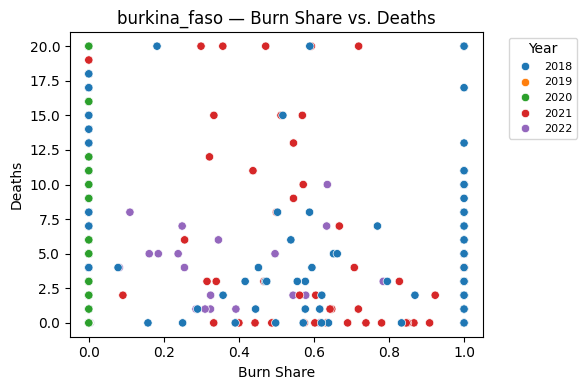

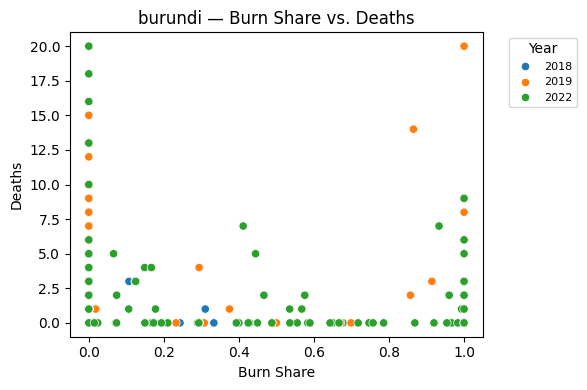

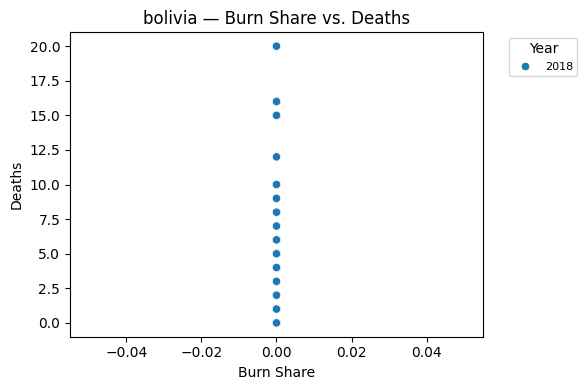

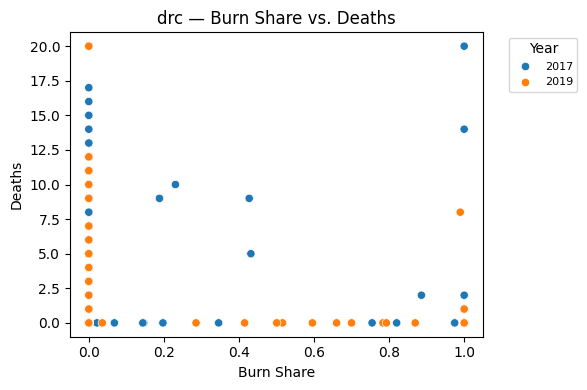

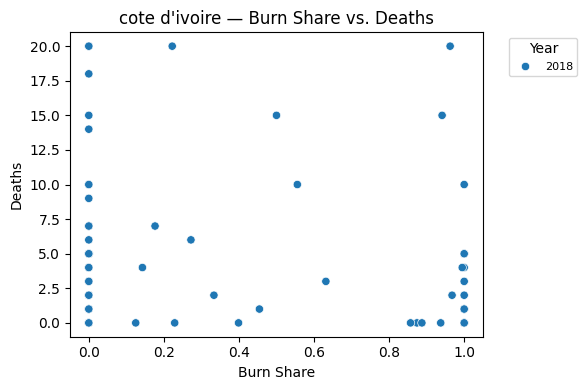

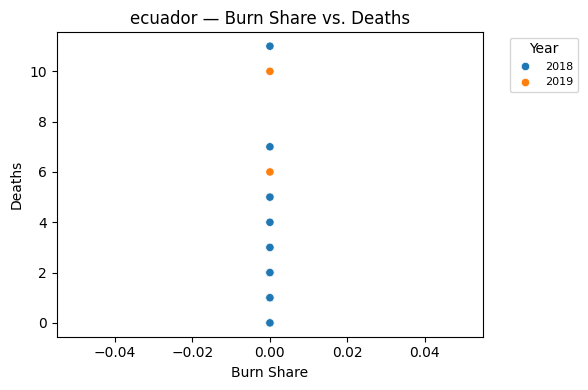

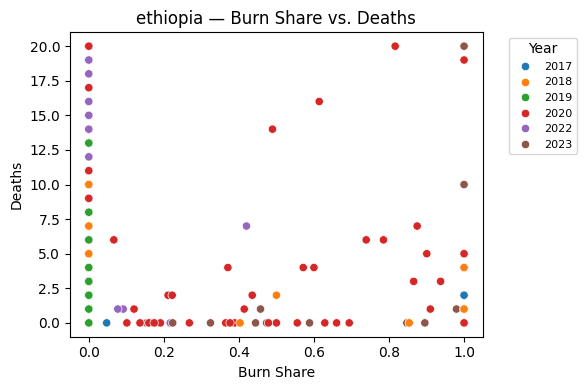

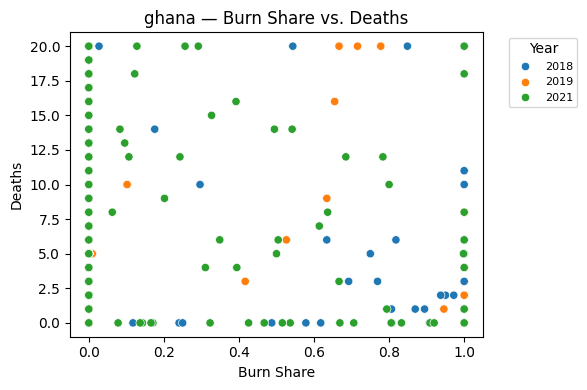

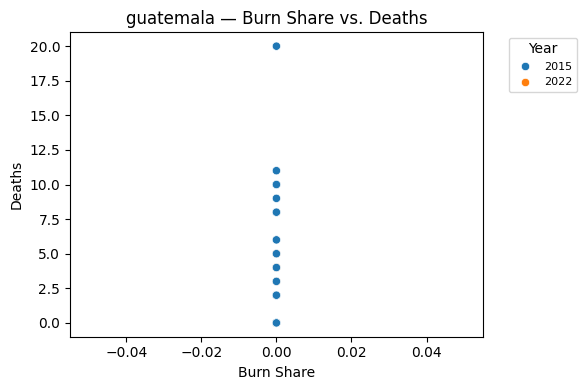

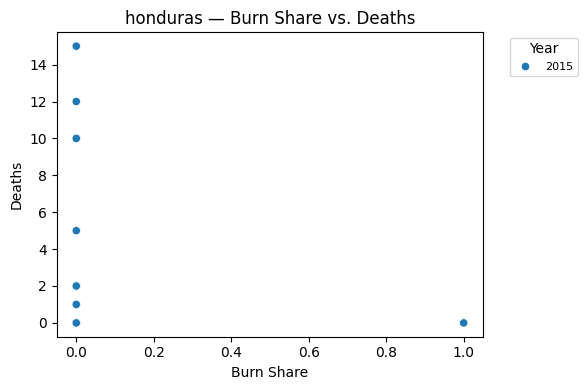

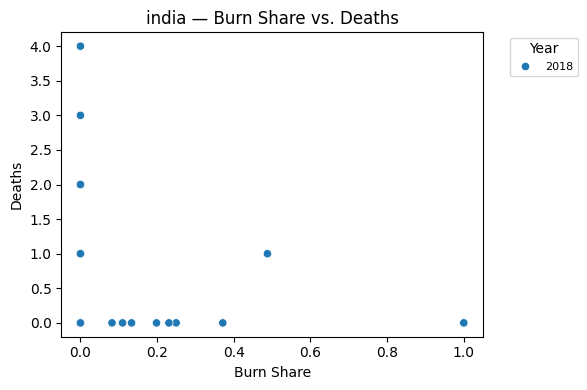

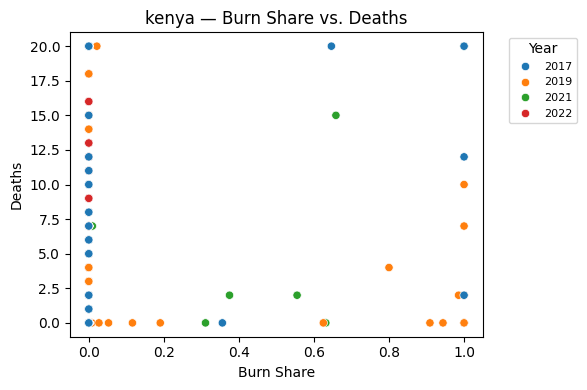

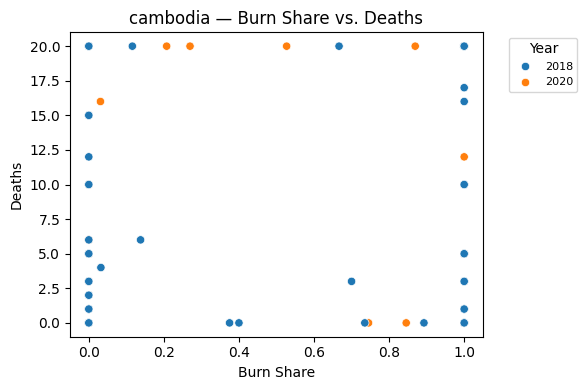

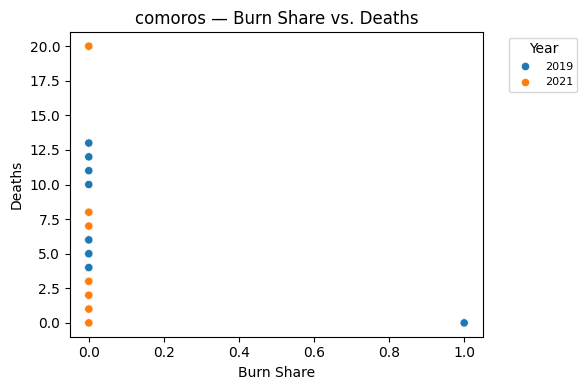

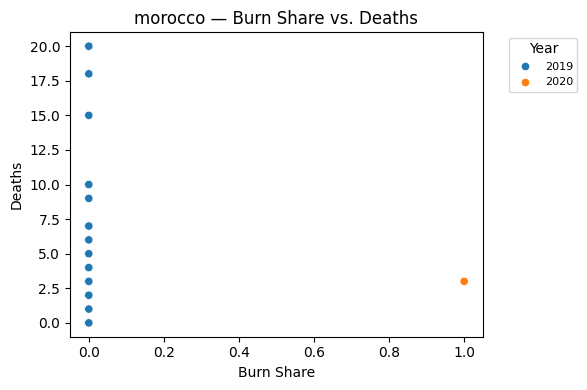

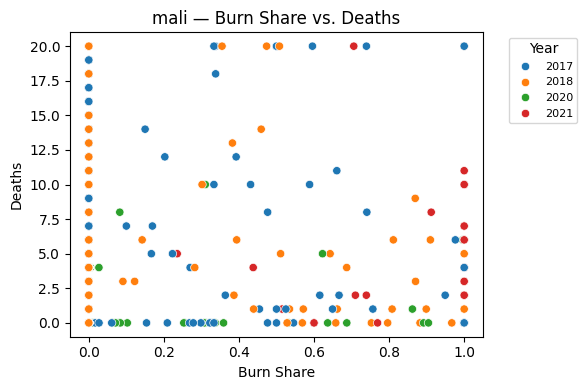

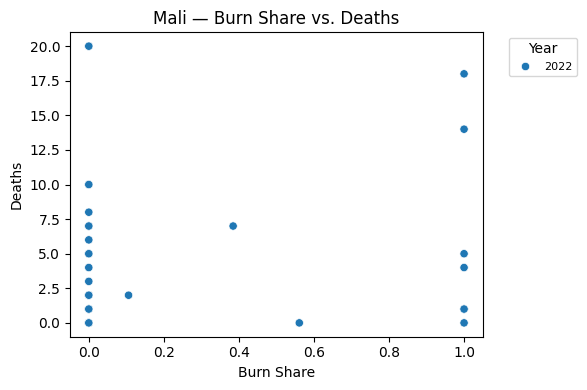

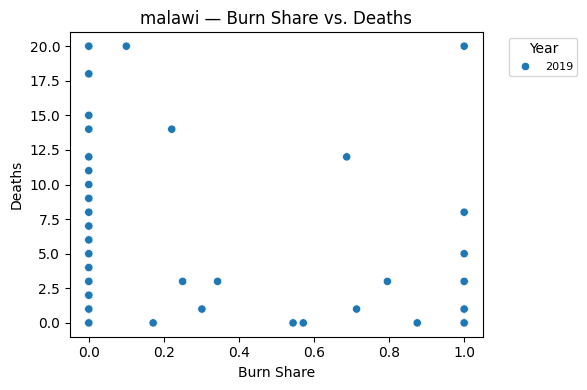

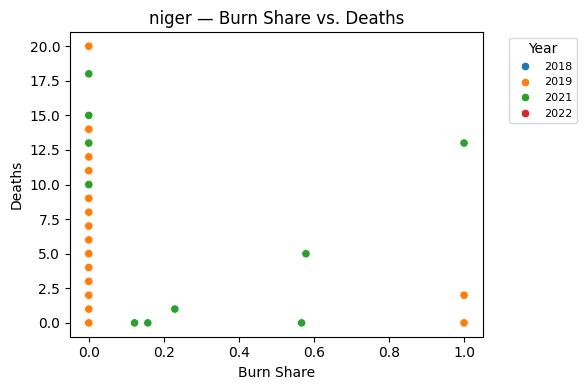

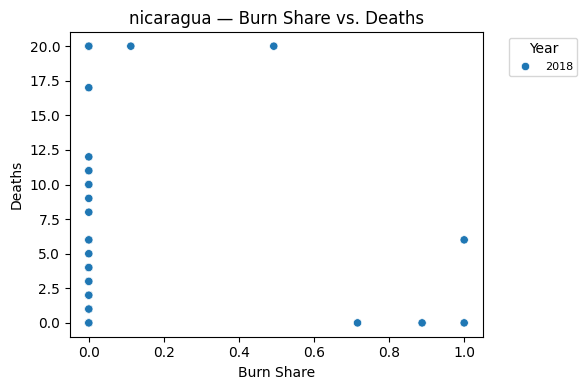

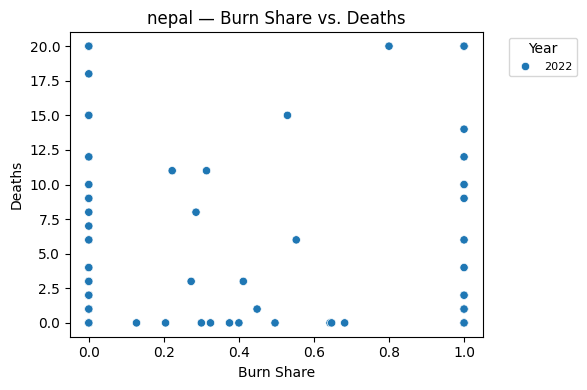

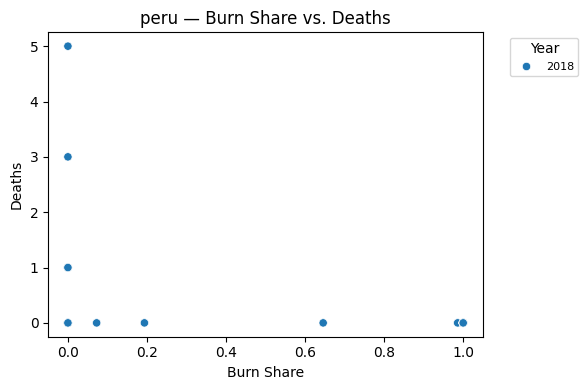

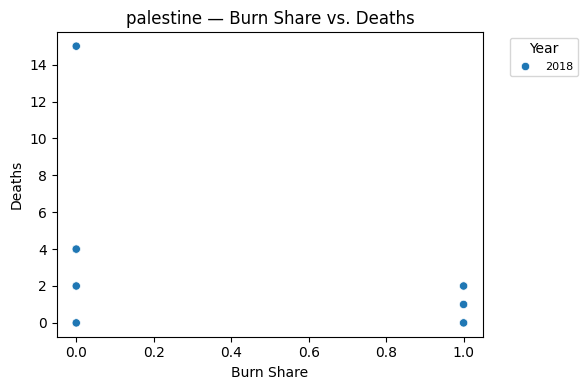

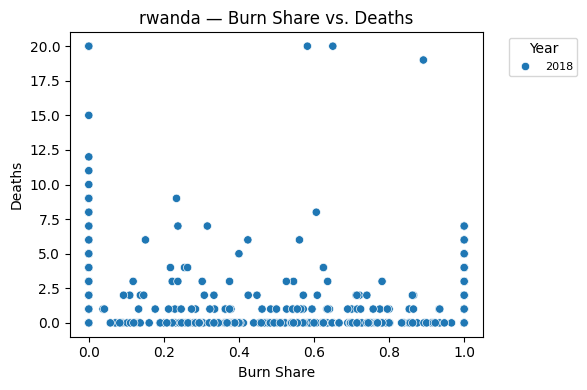

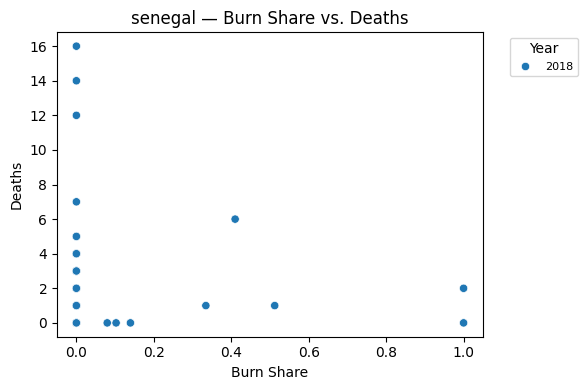

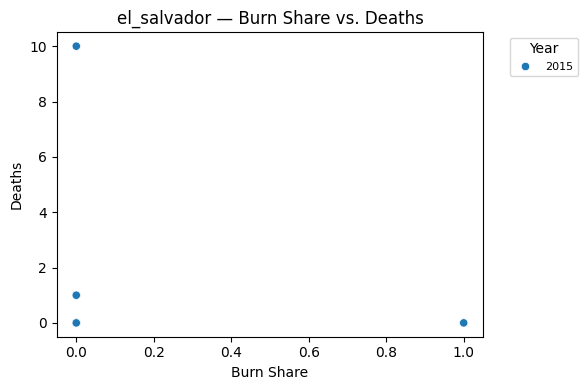

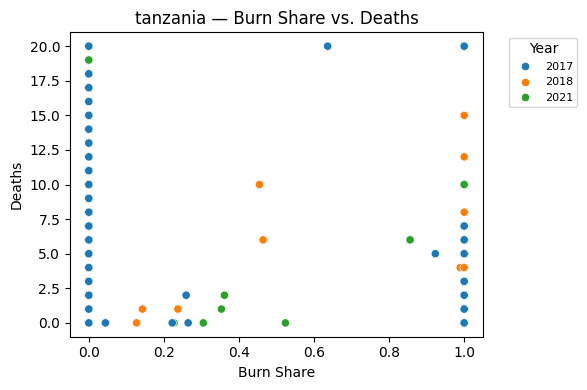

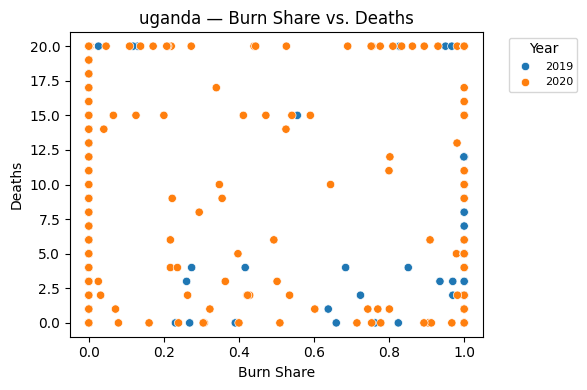

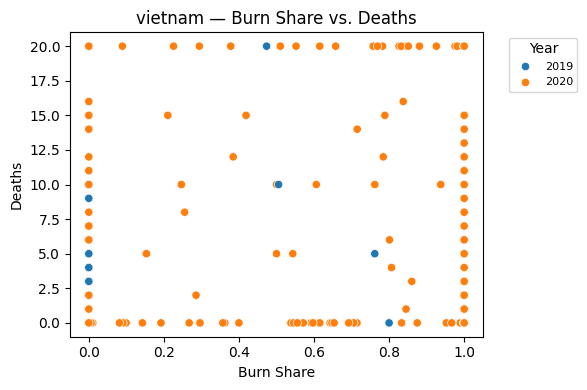

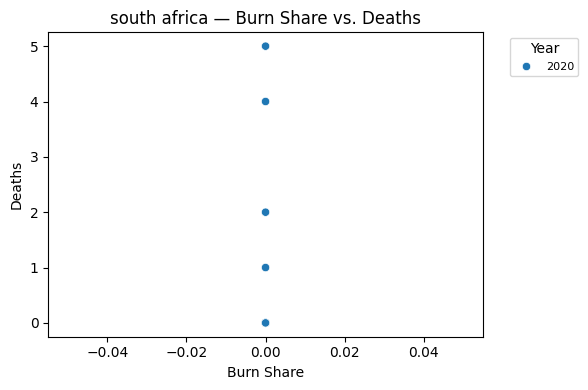

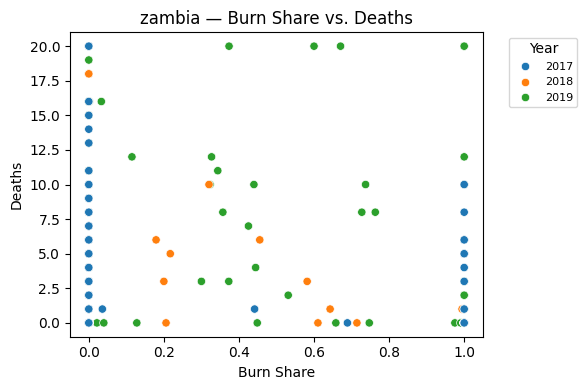

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop over countries
for country in merged_farm_df["country"].unique():
    subset = merged_farm_df[merged_farm_df["country"] == country]
    
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        data=subset,
        x="total_burn_share",
        y="winsorized_deaths",
        hue="year",
        palette="tab10"
    )
    plt.title(f"{country} — Burn Share vs. Deaths")
    plt.xlabel("Burn Share")
    plt.ylabel("Deaths")
    plt.legend(title="Year", fontsize=8,bbox_to_anchor=(1.05, 1),  # move outside right
        loc="upper left")
    plt.tight_layout()
    plt.show()


In [109]:
# Group by country and calculate correlation
corr_by_country = (
    merged_farm_df.groupby("country")
    .apply(lambda g: g["total_burn_share"].corr(g["winsorized_deaths"]))
    .reset_index(name="correlation")
)

print(corr_by_country)


          country  correlation
0            Mali     0.205597
1         bolivia          NaN
2    burkina_faso    -0.003355
3         burundi    -0.043651
4        cambodia     0.119178
5         comoros    -0.026455
6   cote d'ivoire     0.026056
7             drc    -0.029599
8         ecuador          NaN
9     el_salvador    -0.174964
10       ethiopia     0.024688
11          ghana    -0.055509
12      guatemala          NaN
13       honduras    -0.165842
14          india    -0.019690
15          kenya     0.039189
16         malawi    -0.121832
17           mali     0.010184
18        morocco    -0.053412
19          nepal     0.028498
20      nicaragua     0.075188
21          niger     0.050137
22      palestine    -0.422577
23           peru    -0.155944
24         rwanda    -0.030363
25        senegal     0.036516
26   south africa          NaN
27       tanzania    -0.026243
28         uganda     0.122115
29        vietnam     0.000890
30         zambia     0.008641


/Users/nishantshrestha/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nishantshrestha/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_1630/3985056322.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_farm_df.groupby("country")


In [115]:
merged_farm_df[merged_farm_df.country == 'bolivia'].total_burn_share.corr(merged_farm_df[merged_farm_df.country == 'bolivia'].winsorized_deaths)

/Users/nishantshrestha/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nishantshrestha/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


nan

,id_unique,total_burn_share,total_livestock_died,winsorized_deaths,country,year
3057,bo_aid_2018_105_1,0.0,5.0,5.0,bolivia,2018
3058,bo_aid_2018_109_1,0.0,0.0,0.0,bolivia,2018
3059,bo_aid_2018_110_1,0.0,0.0,0.0,bolivia,2018
3060,bo_aid_2018_111_1,0.0,0.0,0.0,bolivia,2018
3061,bo_aid_2018_113_1,0.0,8.0,8.0,bolivia,2018
3062,bo_aid_2018_115_1,0.0,2.0,2.0,bolivia,2018
3063,bo_aid_2018_117_1,0.0,30.0,20.0,bolivia,2018
3064,bo_aid_2018_118_1,0.0,4.0,4.0,bolivia,2018
3065,bo_aid_2018_11_1,0.0,9.0,9.0,bolivia,2018
3066,bo_aid_2018_125_1,0.0,8.0,8.0,bolivia,2018


In [118]:
import statsmodels.api as sm
import pandas as pd

ols_table = []

for country in merged_farm_df["country"].unique():
    subset = merged_farm_df[merged_farm_df["country"] == country]
    
    # Skip if too few observations or no variance
    if subset.shape[0] < 3:
        continue
    if subset["winsorized_deaths"].std() == 0 or subset["total_burn_share"].std() == 0:
        continue
    
    X = sm.add_constant(subset["winsorized_deaths"])
    y = subset["total_burn_share"]
    
    model = sm.OLS(y, X).fit()
    ols_table.append({
        "country": country,
        "intercept": model.params["const"],
        "slope": model.params["winsorized_deaths"],
        "r_squared": model.rsquared,
        "p_value": model.pvalues["winsorized_deaths"],
        "n_obs": subset.shape[0]
    })

ols_df = pd.DataFrame(ols_table).sort_values("r_squared", ascending=False)
print(ols_df)




          country  intercept     slope     r_squared   p_value  n_obs
19      palestine   0.531250 -0.044643  1.785714e-01  0.296940      8
13           Mali   0.113809  0.013971  4.227022e-02  0.152037     50
22    el_salvador   0.151786 -0.017857  3.061224e-02  0.678577      8
6        honduras   0.081531 -0.007925  2.750365e-02  0.510747     18
18           peru   0.245650 -0.068236  2.431844e-02  0.343130     39
24         uganda   0.116202  0.005669  1.491211e-02  0.000329    861
14         malawi   0.241365 -0.008541  1.484305e-02  0.138835    149
9        cambodia   0.225593  0.006052  1.420332e-02  0.134587    159
16      nicaragua   0.022049  0.002303  5.653225e-03  0.354047    154
5           ghana   0.116704 -0.002611  3.081257e-03  0.060085   1148
11        morocco   0.028031 -0.001167  2.852872e-03  0.724432     46
15          niger   0.011022  0.001524  2.513673e-03  0.210316    626
1         burundi   0.154506 -0.005504  1.905399e-03  0.154779   1064
8           kenya   

In [ ]:
subset = merged_farm_df[merged_farm_df["country"] == 'uganda']

In [119]:
merged_farm_df.to_csv('../data/merged_farm_data.csv', index=False)

In [120]:

# OLS with country & year fixed effects
model = smf.ols(
    formula="total_burn_share ~ winsorized_deaths + C(country) + C(year)",
    data=merged_farm_df
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     74.90
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:05:16   Log-Likelihood:                -2417.9
No. Observations:               16437   AIC:                             4914.
Df Residuals:                   16398   BIC:                             5214.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [121]:

# OLS with country & year fixed effects
model = smf.ols(
    formula="total_burn_share ~ winsorized_deaths + C(country)",
    data=merged_farm_df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     78.68
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:06:20   Log-Likelihood:                -2594.0
No. Observations:               16437   AIC:                             5252.
Df Residuals:                   16405   BIC:                             5499.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
#land_tenure - Does your household own land  rent land  use common land
# landowned,unitland_owned - How much land does your household own
#land_slope - Is your land mostly flat  straight   sloping or steep slopes
# landcultivated,unitland

#count_people - Total number of household members, calculated if enabled in the ODK definition file
# harvest_early - Did you harvest any of your crops early during the last 12 months
# crop_count
# debts_have
#foodshortagetime - Is there a time of year when there is a less food compared to other times
#ppi_1 -  How many members does the household have

In [ ]:
df.crop

,id_unique,total_burn_share,total_livestock_died,winsorized_deaths,country,year
0,bf_adn_2019_10_1,0.0,3.0,3.0,burkina_faso,2019
1,bf_adn_2019_15_1,0.0,2.0,2.0,burkina_faso,2019
2,bf_adn_2019_23_1,0.0,3.0,3.0,burkina_faso,2019
3,bf_adn_2019_24_1,0.0,2.0,2.0,burkina_faso,2019
4,bf_adn_2019_26_1,0.0,10.0,10.0,burkina_faso,2019
...,...,...,...,...,...,...
16432,zm_scn_2017_89_1,0.0,4.0,4.0,zambia,2017
16433,zm_scn_2017_94_1,0.0,0.0,0.0,zambia,2017
16434,zm_scn_2017_95_1,0.0,0.0,0.0,zambia,2017
16435,zm_scn_2017_96_1,0.0,1.0,1.0,zambia,2017


In [ ]:
df.land_tenure.value_counts() # own : own

land_tenure
own_land                                   32201
own_land rent_in_land                       4839
rent_in_land                                2112
own_land_certificate                        1834
own_land_certificate rent_in_land            963
                                           ...  
common_land own_land_no_certificate            1
own_land communal_land customary_access        1
rent_out_land none                             1
own_land no_land                               1
communal_land family_land                      1
Name: count, Length: 217, dtype: int64

In [128]:
df.unitland_owned.value_counts()

unitland_owned
hectare              12629
acres                10114
hectares              2939
ares                  2004
acre                  1266
                     ...  
beluk                    1
belak                    1
a quarter an acre        1
100 by 100               1
bags of maize            1
Name: count, Length: 83, dtype: int64

In [130]:
df.land_slope.value_counts()

land_slope
flat                               21794
flat slope                          5999
slope                               5723
moderate_slope                      2124
steep_slope                         1365
flat steep_slope                     957
slope flat                           921
flat slope steep_slope               593
slope steep_slope                    565
steep_slope flat                     169
steep_slope slope                     83
flat steep_slope slope                57
slope flat steep_slope                57
terraces slope                        56
slope terraces                        54
flat terraces slope                   52
flat terraces                         50
terraces                              48
slope steep_slope flat                41
flat terraced                         28
steep_slope slope flat                24
no_answer                             23
steep_slope flat slope                13
slope terraces flat                   12
flat 

In [132]:
df.unitland.value_counts()

unitland
hectare                      17353
acres                        12323
hectares                      9513
acre                          2543
ares                          2493
                             ...  
pas de mesure                    1
fddane (small land)              1
trees                            1
small land                       1
galons (5litr) containers        1
Name: count, Length: 108, dtype: int64

In [134]:
df.count_people.value_counts()

count_people
5.0      3800
6.0      3769
4.0      3437
7.0      3080
8.0      2403
         ... 
117.0       1
58.0        1
74.0        1
78.0        1
67.0        1
Name: count, Length: 83, dtype: int64

In [135]:
df.harvest_early.value_counts()

harvest_early
n            31644
y            10309
no_answer       39
Name: count, dtype: int64

In [136]:
df.crop_count.value_counts()

crop_count
1.0     15117
2.0     15092
3.0     10535
4.0      4128
5.0      3582
0.0       531
8.0       103
6.0        84
7.0        65
10.0        1
Name: count, dtype: int64

In [ ]:
df.debts_have.value_counts() # reverse causality

debts_have
n            28212
y            13762
dont_know      138
no_answer      134
Name: count, dtype: int64

In [138]:
df.foodshortagetime.value_counts()

foodshortagetime
y            32097
n            15302
no_answer       44
Name: count, dtype: int64

In [139]:
merged_farm_df

,id_unique,total_burn_share,total_livestock_died,winsorized_deaths,country,year
0,bf_adn_2019_10_1,0.0,3.0,3.0,burkina_faso,2019
1,bf_adn_2019_15_1,0.0,2.0,2.0,burkina_faso,2019
2,bf_adn_2019_23_1,0.0,3.0,3.0,burkina_faso,2019
3,bf_adn_2019_24_1,0.0,2.0,2.0,burkina_faso,2019
4,bf_adn_2019_26_1,0.0,10.0,10.0,burkina_faso,2019
...,...,...,...,...,...,...
16432,zm_scn_2017_89_1,0.0,4.0,4.0,zambia,2017
16433,zm_scn_2017_94_1,0.0,0.0,0.0,zambia,2017
16434,zm_scn_2017_95_1,0.0,0.0,0.0,zambia,2017
16435,zm_scn_2017_96_1,0.0,1.0,1.0,zambia,2017


In [140]:
# Crop count
merged_farm_df = merged_farm_df.merge(
    df[["id_unique", "crop_count"]],
    on="id_unique",
    how="left"
)

# Harvest early
merged_farm_df = merged_farm_df.merge(
    df[["id_unique", "harvest_early"]],
    on="id_unique",
    how="left"
)

# Food shortage time
merged_farm_df = merged_farm_df.merge(
    df[["id_unique", "foodshortagetime"]],
    on="id_unique",
    how="left"
)

# Debts have
merged_farm_df = merged_farm_df.merge(
    df[["id_unique", "debts_have"]],
    on="id_unique",
    how="left"
)

# Count people
merged_farm_df = merged_farm_df.merge(
    df[["id_unique", "count_people"]],
    on="id_unique",
    how="left"
)


In [141]:
merged_farm_df

,id_unique,total_burn_share,total_livestock_died,winsorized_deaths,country,year,crop_count,harvest_early,foodshortagetime,debts_have,count_people
0,bf_adn_2019_10_1,0.0,3.0,3.0,burkina_faso,2019,3.0,y,y,n,9.0
1,bf_adn_2019_15_1,0.0,2.0,2.0,burkina_faso,2019,3.0,n,y,n,4.0
2,bf_adn_2019_23_1,0.0,3.0,3.0,burkina_faso,2019,1.0,y,y,y,8.0
3,bf_adn_2019_24_1,0.0,2.0,2.0,burkina_faso,2019,2.0,n,y,y,8.0
4,bf_adn_2019_26_1,0.0,10.0,10.0,burkina_faso,2019,1.0,n,y,y,5.0
...,...,...,...,...,...,...,...,...,...,...,...
16432,zm_scn_2017_89_1,0.0,4.0,4.0,zambia,2017,3.0,y,y,n,NaN
16433,zm_scn_2017_94_1,0.0,0.0,0.0,zambia,2017,1.0,n,n,n,NaN
16434,zm_scn_2017_95_1,0.0,0.0,0.0,zambia,2017,1.0,n,n,n,NaN
16435,zm_scn_2017_96_1,0.0,1.0,1.0,zambia,2017,3.0,n,y,y,NaN


In [142]:
merged_farm_df.describe()

,total_burn_share,total_livestock_died,winsorized_deaths,year,crop_count,count_people
count,16437.000000,1.643700e+04,16437.000000,16437.000000,16437.000000,9145.000000
mean,0.117814,2.552887e+02,3.184462,2019.521385,2.840604,7.709349
std,0.303679,3.120270e+04,5.551090,1.660269,1.285919,5.718359
min,0.000000,0.000000e+00,0.000000,2015.000000,1.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,2018.000000,2.000000,5.000000
50%,0.000000,0.000000e+00,0.000000,2019.000000,3.000000,6.000000
75%,0.000000,4.000000e+00,4.000000,2021.000000,4.000000,9.000000
max,1.000000,4.000000e+06,20.000000,2023.000000,8.000000,92.000000


In [143]:
for col in ["harvest_early", "foodshortagetime", "debts_have"]:
    merged_farm_df[col] = merged_farm_df[col].map({"y": 1, "n": 0})
merged_farm_df

,id_unique,total_burn_share,total_livestock_died,winsorized_deaths,country,year,crop_count,harvest_early,foodshortagetime,debts_have,count_people
0,bf_adn_2019_10_1,0.0,3.0,3.0,burkina_faso,2019,3.0,1.0,1.0,0.0,9.0
1,bf_adn_2019_15_1,0.0,2.0,2.0,burkina_faso,2019,3.0,0.0,1.0,0.0,4.0
2,bf_adn_2019_23_1,0.0,3.0,3.0,burkina_faso,2019,1.0,1.0,1.0,1.0,8.0
3,bf_adn_2019_24_1,0.0,2.0,2.0,burkina_faso,2019,2.0,0.0,1.0,1.0,8.0
4,bf_adn_2019_26_1,0.0,10.0,10.0,burkina_faso,2019,1.0,0.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
16432,zm_scn_2017_89_1,0.0,4.0,4.0,zambia,2017,3.0,1.0,1.0,0.0,NaN
16433,zm_scn_2017_94_1,0.0,0.0,0.0,zambia,2017,1.0,0.0,0.0,0.0,NaN
16434,zm_scn_2017_95_1,0.0,0.0,0.0,zambia,2017,1.0,0.0,0.0,0.0,NaN
16435,zm_scn_2017_96_1,0.0,1.0,1.0,zambia,2017,3.0,0.0,1.0,1.0,NaN


In [144]:
print("\n--- Base Model ---")
model = smf.ols(
    formula="total_burn_share ~ winsorized_deaths + C(year) + C(country)",
    data=merged_farm_df
).fit()
print(model.summary())


--- Base Model ---
                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     74.90
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:09:12   Log-Likelihood:                -2417.9
No. Observations:               16437   AIC:                             4914.
Df Residuals:                   16398   BIC:                             5214.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [ ]:
# crop_count
print("\n--- Add crop_count ---")
model = smf.ols(
    formula="total_burn_share ~ winsorized_deaths + C(year) + C(country) + crop_count",
    data=merged_farm_df
).fit()
print(model.summary())


--- Add crop_count ---
                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     73.06
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:10:03   Log-Likelihood:                -2416.5
No. Observations:               16437   AIC:                             4913.
Df Residuals:                   16397   BIC:                             5221.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [146]:
# harvest_early
print("\n--- Add harvest_early ---")
model = smf.ols(
    formula="total_burn_share ~ winsorized_deaths + C(year) + C(country) + harvest_early",
    data=merged_farm_df
).fit()
print(model.summary())


--- Add harvest_early ---
                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     74.05
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:11:38   Log-Likelihood:                -2431.1
No. Observations:               14305   AIC:                             4940.
Df Residuals:                   14266   BIC:                             5235.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
# foodshortagetime
print("\n--- Add foodshortagetime ---")
model = smf.ols(
    formula="total_burn_share ~ winsorized_deaths + C(year) + C(country) + foodshortagetime",
    data=merged_farm_df
).fit()
print(model.summary())


--- Add foodshortagetime ---
                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     73.26
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:12:15   Log-Likelihood:                -2414.8
No. Observations:               16429   AIC:                             4910.
Df Residuals:                   16389   BIC:                             5218.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [148]:
print("\n--- Add debts_have ---")
model = smf.ols(
    formula="total_burn_share ~ winsorized_deaths + C(year) + C(country) + debts_have",
    data=merged_farm_df
).fit()
print(model.summary())


--- Add debts_have ---
                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     43.61
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          1.03e-281
Time:                        09:13:05   Log-Likelihood:                -1093.4
No. Observations:               13410   AIC:                             2259.
Df Residuals:                   13374   BIC:                             2529.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
print("\n--- Add count_people ---")
model = smf.ols(
    formula="total_burn_share ~ winsorized_deaths + C(year) + C(country) + count_people",
    data=merged_farm_df
).fit()
print(model.summary())  # observations reduced a lot 


--- Add count_people ---
                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     70.79
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          2.75e-291
Time:                        09:13:31   Log-Likelihood:                -248.25
No. Observations:                9145   AIC:                             542.5
Df Residuals:                    9122   BIC:                             706.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
# todo - herdsize ~ livestock death
#livestock death ~ what is correlated with this
# 
